In [1]:
import pandas as pd
import numpy as np

data_MALT90 = pd.read_csv('malt90line.csv', sep=',', low_memory=False)

cols_may = ['ag_long', 'ag_lat', 'ag_flux_peak']
other_cols = ['ag_name', 'classification', 'Vc', 'tau', 'dtau'] # 
mol_cols = [['hcop_D', 'hcop_Tastar', 'hcop_Vlsr', 'hcop_fwhm', 'hcop_ii', 'hcop_Rf'],
            ['hnc_D', 'hnc_Tastar', 'hnc_Vlsr', 'hnc_fwhm', 'hnc_ii', 'hnc_Rf'],
            ['n2hp_D', 'n2hp_Tastar', 'n2hp_Vlsr', 'n2hp_fwhm', 'n2hp_ii', 'n2hp_Rf'],
            ['hcn_D', 'hcn_Tastar', 'hcn_Vlsr', 'hcn_fwhm', 'hcn_ii', 'hcn_Rf'],
            ['h13cop_D', 'h13cop_Tastar', 'h13cop_Vlsr', 'h13cop_fwhm', 'h13cop_ii', 'h13cop_Rf'],
            ['hn13c_D', 'hn13c_Tastar', 'hn13c_Vlsr', 'hn13c_fwhm', 'hn13c_ii', 'hn13c_Rf'],
            ['13cs_D', '13cs_Tastar', '13cs_Vlsr', '13cs_fwhm', '13cs_ii', '13cs_Rf'],
            ['13c34s_D', '13c34s_Tastar', '13c34s_Vlsr', '13c34s_fwhm', '13c34s_ii', '13c34s_Rf'],
            ['hc13ccn_D', 'hc13ccn_Tastar', 'hc13ccn_Vlsr', 'hc13ccn_fwhm', 'hc13ccn_ii', 'hc13ccn_Rf'],
            ['hnco404_D', 'hnco404_Tastar', 'hnco404_Vlsr', 'hnco404_fwhm', 'hnco404_ii', 'hnco404_Rf'],
            ['ch3cn_D', 'ch3cn_Tastar', 'ch3cn_Vlsr', 'ch3cn_fwhm', 'ch3cn_ii', 'ch3cn_Rf'],
            ['hc3n_D', 'hc3n_Tastar', 'hc3n_Vlsr', 'hc3n_fwhm', 'hc3n_ii', 'hc3n_Rf'],
            ['hnco413_D', 'hnco413_Tastar', 'hnco413_Vlsr', 'hnco413_fwhm', 'hnco413_ii', 'hnco413_Rf'],
            ['c2h_D', 'c2h_Tastar', 'c2h_Vlsr', 'c2h_fwhm', 'c2h_ii', 'c2h_Rf'],
            ['sio_D', 'sio_Tastar', 'sio_Vlsr', 'sio_fwhm', 'sio_ii', 'sio_Rf'],
            ['h41a_D', 'h41a_NG', 'h41a_Tastar', 'h41a_Vlsr', 'h41a_fwhm', 'h41a_ii', 'h41a_Rf']]

# Избавляемся от названий объектов
data_MALT90.drop(columns = ['ag_name', 'Vc'], inplace=True)

# Избавляемся от столбцов в которых данных меньше 1000
new_mol_cols = []
for i in range(len(mol_cols)):
    num = data_MALT90[mol_cols[i][0]].loc[data_MALT90[mol_cols[i][0]] != 'N'].count()
    if num >= 0.75*len(data_MALT90):
        data_MALT90.drop(columns=[mol_cols[i][0]], inplace=True)
        new_mol_cols.insert(i, mol_cols[i][1:])
        continue
    else:
        data_MALT90.drop(columns=mol_cols[i], inplace=True)

# Замена маркеров Yes, Maybe, No на 1, 0, -1
data_MALT90.replace(['Y', 'M', 'N'], [1, 0, -1], inplace=True)
data_MALT90

,ag_long,ag_lat,ag_flux_peak,classification,tau,dtau,hcop_Tastar,hcop_Vlsr,hcop_fwhm,hcop_ii,...,hnc_Tastar,hnc_Vlsr,hnc_fwhm,hnc_ii,hnc_Rf,hcn_Tastar,hcn_Vlsr,hcn_fwhm,hcn_ii,hcn_Rf
0,0.002,0.174,0.46,P,0.82,1.34,0.294,104.455,31.422,11.020,...,0.374,110.867,12.386,5.057,0.875,0.362,104.185,29.308,12.412,1.500
1,0.002,0.174,0.46,P,0.00,0.00,0.427,-7.158,2.545,1.158,...,0.000,0.000,0.000,0.000,0.000,0.422,-7.192,2.001,0.900,1.654
2,0.006,0.157,1.76,U,0.08,0.31,2.411,-6.578,2.136,5.388,...,1.461,-6.519,1.974,3.172,1.119,2.021,-6.554,2.097,6.910,1.303
3,0.006,0.157,1.76,U,0.00,0.00,0.362,106.479,33.233,13.832,...,0.347,107.978,17.168,6.673,1.156,0.409,105.859,29.499,13.942,1.585
4,0.013,-0.019,5.11,Q,0.00,0.00,0.705,-17.748,9.867,6.828,...,0.367,-16.128,17.644,7.645,1.578,0.608,-17.283,7.948,5.007,1.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,359.989,0.087,6.38,U,0.00,0.00,0.415,86.155,38.174,18.976,...,0.354,82.870,22.046,9.039,1.004,0.561,84.568,38.067,24.665,1.446
3552,359.990,0.107,0.58,U,0.00,0.00,0.600,92.093,37.269,25.467,...,0.647,92.536,28.038,20.192,1.212,0.754,91.280,38.357,34.917,2.130
3553,359.992,0.136,0.96,H,0.00,0.00,0.361,100.469,35.080,16.367,...,0.511,108.753,22.219,13.575,1.279,0.451,100.541,35.305,20.346,1.195
3554,359.994,-0.472,0.69,Q,0.00,0.00,1.136,18.872,2.769,3.546,...,0.751,18.809,2.602,1.920,1.430,0.596,18.664,2.718,2.972,1.157


In [2]:
classes = data_MALT90['classification'].unique()
full_original_classes = data_MALT90['classification'].to_numpy()

data_MALT90.replace(to_replace=classes, value=[i for i in range(len(classes))], inplace=True)
data_MALT90

,ag_long,ag_lat,ag_flux_peak,classification,tau,dtau,hcop_Tastar,hcop_Vlsr,hcop_fwhm,hcop_ii,...,hnc_Tastar,hnc_Vlsr,hnc_fwhm,hnc_ii,hnc_Rf,hcn_Tastar,hcn_Vlsr,hcn_fwhm,hcn_ii,hcn_Rf
0,0.002,0.174,0.46,0,0.82,1.34,0.294,104.455,31.422,11.020,...,0.374,110.867,12.386,5.057,0.875,0.362,104.185,29.308,12.412,1.500
1,0.002,0.174,0.46,0,0.00,0.00,0.427,-7.158,2.545,1.158,...,0.000,0.000,0.000,0.000,0.000,0.422,-7.192,2.001,0.900,1.654
2,0.006,0.157,1.76,1,0.08,0.31,2.411,-6.578,2.136,5.388,...,1.461,-6.519,1.974,3.172,1.119,2.021,-6.554,2.097,6.910,1.303
3,0.006,0.157,1.76,1,0.00,0.00,0.362,106.479,33.233,13.832,...,0.347,107.978,17.168,6.673,1.156,0.409,105.859,29.499,13.942,1.585
4,0.013,-0.019,5.11,2,0.00,0.00,0.705,-17.748,9.867,6.828,...,0.367,-16.128,17.644,7.645,1.578,0.608,-17.283,7.948,5.007,1.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,359.989,0.087,6.38,1,0.00,0.00,0.415,86.155,38.174,18.976,...,0.354,82.870,22.046,9.039,1.004,0.561,84.568,38.067,24.665,1.446
3552,359.990,0.107,0.58,1,0.00,0.00,0.600,92.093,37.269,25.467,...,0.647,92.536,28.038,20.192,1.212,0.754,91.280,38.357,34.917,2.130
3553,359.992,0.136,0.96,3,0.00,0.00,0.361,100.469,35.080,16.367,...,0.511,108.753,22.219,13.575,1.279,0.451,100.541,35.305,20.346,1.195
3554,359.994,-0.472,0.69,2,0.00,0.00,1.136,18.872,2.769,3.546,...,0.751,18.809,2.602,1.920,1.430,0.596,18.664,2.718,2.972,1.157


In [13]:
# Выделяем обучающую выборку
train_set = data_MALT90[0:2489]
Y_train = train_set['classification']
X_train = train_set.drop(columns=['classification'])

# Выделяем тестовую выборку
test_set = data_MALT90[2489:3556]
Y_test = test_set['classification']
X_test = test_set.drop(columns=['classification'])

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train_std, Y_train)
Y_pred = reg.predict(X_test_std)


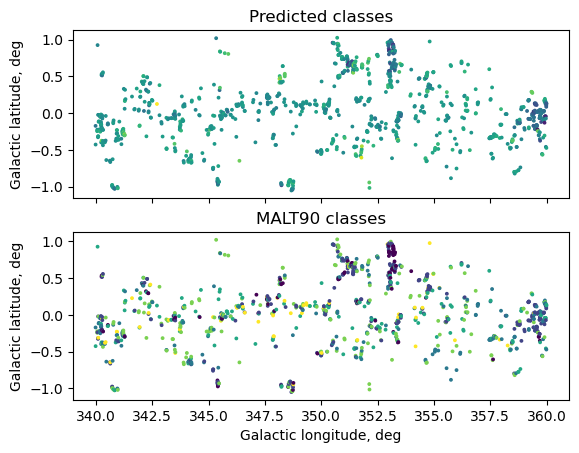

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(X_test['ag_long'], X_test['ag_lat'],
              c=Y_pred, s=3)
ax[1].scatter(X_test['ag_long'], X_test['ag_lat'],
              c=Y_test, s=3)
ax[0].set_title('Predicted classes')
ax[1].set_title('MALT90 classes')
ax[1].set_xlabel('Galactic longitude, deg')
ax[0].set_ylabel('Galactic latitude, deg')
ax[1].set_ylabel('Galactic latitude, deg')
fig.savefig('figures/classification/Bayesian_ridge_classification.eps')